In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install keras


  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/8d/44/c604ecc5c9993b6574a681f2f505e980725871a89cfd9e48597b12ccb506/keras-3.3.3-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Obtaining dependency information for namex from https://files.pythonhosted.org/packages/73/59/7854fbfb59f8ae35483ce93493708be5942ebb6328cd85b3a609df629736/namex-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for optree from https://files.pythonhosted.org/packages/8

In [7]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/package

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
from flask import Flask, render_template, request,redirect,url_for
app = Flask(__name__)



dir_example = "./plant/"

classes = os.listdir(dir_example)
print(classes)

train = "./plant/"


# from tensorflow.keras.models import h5py
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# Create a generator
train_datagen = ImageDataGenerator(
  rescale=1./255
)
train_datagen = train_datagen.flow_from_directory(
        train,
        batch_size=32,
        target_size=(300, 300),
        class_mode='sparse')

#Printing the training set
labels = (train_datagen.class_indices)
print(labels,'\n')



for image_batch, label_batch in train_datagen:
      break
image_batch.shape, label_batch.shape
# print(label_batch)



model=Sequential()

#Convolution blocks
model.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Conv2D(32, kernel_size = (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))


model.summary()

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_datagen,
          epochs=25,
          steps_per_epoch=382//32)
model.save("platt25.h5")
model = load_model('platt25.h5')
print(train_datagen.class_indices)
Labels = '\n'.join(sorted(train_datagen.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)
class_names = list(labels.keys())

from tensorflow.keras.preprocessing import image
import numpy as np
test_img = '/content/drive/MyDrive/plant/Apple/AppleHealthy(104).JPG'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability: ",np.max(prediction[0], axis=-1))
predicted_class = class_names[np.argmax(prediction[0], axis=-1)]
print("Classified: ",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

['Apple', 'Bell pepper', 'Cherry', 'Citrus', 'Corn', 'Grape', 'Peach', 'Potato', 'Strawberry', 'Tomato']
Found 9328 images belonging to 10 classes.
{'Apple': 0, 'Bell pepper': 1, 'Cherry': 2, 'Citrus': 3, 'Corn': 4, 'Grape': 5, 'Peach': 6, 'Potato': 7, 'Strawberry': 8, 'Tomato': 9} 



AttributeError: module 'keras.src.backend' has no attribute 'standardize_data_format'

1/1 [==============================] - 0s 137ms/step
Probability:  0.41522378
Classified:  Tomato 



Text(0.5, 1.0, 'Loaded Image')

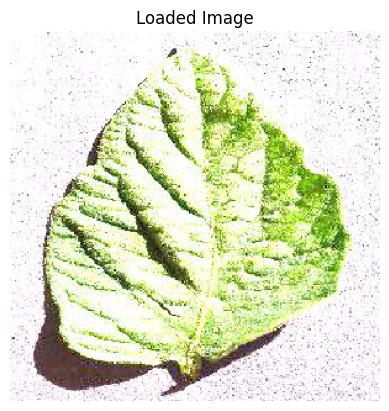

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
test_img = '/content/drive/MyDrive/plant/Tomato/TomatoHealthy(10).JPG'
img = image.load_img(test_img, target_size = (300,300))
img = image.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

print("Probability: ",np.max(prediction[0], axis=-1))
predicted_class = class_names[np.argmax(prediction[0], axis=-1)]
print("Classified: ",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [9]:
pip install tensorflow numpy matplotlib opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/76/9e/4d47a69d3338a00c51535028d25a7d1a17c4762e4a46ae6a577f495de252/opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 487.6 kB/s eta 0:01:20
   ---------------------------------------- 0.1/38.8 MB 930.9 kB/s eta 0:00:42
   ---------------------------------------- 0.2/38.8 MB 978.3 kB/s eta 0:00:40
   ---------------------------------------- 0.2/38.8 MB 903.5 kB/s eta 0:00:43
   ---------------------------------------- 0.2/38.8 MB 860.2 kB/s eta 0:00:45
   ---------------------------------------- 0.3/38.8 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.4/38.8 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.5/38.8 MB 1.2 MB/s eta 0:00:33
    --------

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to your dataset
dataset_path = './plant/'

# Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Split dataset for validation

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Set as training data

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Set as validation data
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25)
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation loss: {val_loss}')
print(f'Validation accuracy: {val_acc}')

# Test with a new image
def load_and_preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

test_image_path = './plant/Cherry/CherryHealthy(1000).JPG'
test_image = load_and_preprocess_image(test_image_path)

# Predict the class of the image
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'The predicted class is: {predicted_label}')


Found 7466 images belonging to 10 classes.
Found 1862 images belonging to 10 classes.


C:\Users\Accolade\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'keras.src.backend' has no attribute 'standardize_data_format'